# Capstone: Battle of the Neighborhoods. Understanding the borough, and then neighborhood within those boroughs, that is most suited for a personal trainer to relocate to

### 1) Importing relevant data for New York

In [2]:
#import relevant libaries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopy

print('Imported')

Imported


In [3]:
#import further relevant libaries
from geopy.geocoders import Nominatim 
import geopy
# convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium

import json # library to handle JSON files

print('Imported')


     |████████████████████████████████| 102kB 10.4MB/s ta 0:00:01
Imported


First we will download and exploring the data set.

In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


We will then load the dataset.

In [5]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [1]:
#newyork_data

Now we will Define a variable which includes the above data.

In [7]:
areas_data = newyork_data['features']

Looking at first item in data frame.

In [8]:
areas_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Tranform the data into a pandas dataframe

In [9]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
areas = pd.DataFrame(columns=column_names)


Adding the data to the above frame - looping through data filling the df sequentially.

In [10]:
# create dataframe of just boroughs and find lat and long then do gym analysis with wide radius. 

for data in areas_data:
    borough = areas_name = data['properties']['borough'] 
    areas_name = data['properties']['name']
        
    areas_latlon = data['geometry']['coordinates']
    areas_lat = areas_latlon[1]
    areas_lon = areas_latlon[0]
    
    areas = areas.append({'Borough': borough,
                                          'Neighborhood': areas_name,
                                          'Latitude': areas_lat,
                                          'Longitude': areas_lon}, ignore_index=True)

Checking the dataframe is created and has the correct columns and data.

In [11]:
areas.head(60)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(areas['Borough'].unique()),
        areas.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Next, use geopy library to get the latitude and longitude values of New York City. Then use folium to visualise the New York Neighborhoods.

In [13]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(areas['Latitude'], areas['Longitude'], areas['Borough'], areas['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Refining the dataset to initial areas of interest i.e. Boroughs

In [15]:
df_borough = areas.drop_duplicates(subset='Borough', keep='first')

In [16]:
df_boroughs_located = df_borough.drop(['Latitude','Longitude','Neighborhood'], axis=1)
df_boroughs_located.reset_index(drop=True)

,Borough
0,Bronx
1,Manhattan
2,Brooklyn
3,Queens
4,Staten Island


Finding the lat and long of the New York boroughs.

In [17]:

from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store 
# latitude and longitude of values  
# of city column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(Borough): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="my-application") 
          
        return geolocator.geocode(Borough + ',New York') 
      
    except GeocoderTimedOut: 
          
        return findGeocode(Borough + ',New York')     
  
# each value from city column 
# will be fetched and sent to 
# function find_geocode    
for i in (df_boroughs_located["Borough"]): 
    
    if findGeocode(i) != None: 
           
        loc = findGeocode(i)
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [18]:
# now add this column to dataframe 
df_boroughs_located["Latitude"] = latitude 
df_boroughs_located["Longitude"] = longitude 
df_boroughs_located=df_boroughs_located.reset_index(drop=True)
df_boroughs_located

,Borough,Latitude,Longitude
0,Bronx,40.850656,-73.866524
1,Manhattan,40.789624,-73.959894
2,Brooklyn,40.650104,-73.949582
3,Queens,40.749824,-73.797634
4,Staten Island,40.583456,-74.149605


In [19]:
df_boroughs_located['Latitude'] = pd.to_numeric(df_boroughs_located['Latitude'], errors='coerce')
df_boroughs_located['Longitude'] = pd.to_numeric(df_boroughs_located['Longitude'], errors='coerce')



In [20]:
# adding colors to assist in visualisaiton
df_boroughs_located["Color"]=df_boroughs_located["Borough"].map({'Bronx':"red", 'Manhattan':"green", 'Brooklyn':"blue",
       'Queens':"yellow",'Staten Island':"purple",})

df_boroughs_located

,Borough,Latitude,Longitude,Color
0,Bronx,40.850656,-73.866524,red
1,Manhattan,40.789624,-73.959894,green
2,Brooklyn,40.650104,-73.949582,blue
3,Queens,40.749824,-73.797634,yellow
4,Staten Island,40.583456,-74.149605,purple


### 2) Importing relevant data for Toronto

In [4]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
webseitdata=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
print("done")

done


Scraping the Wikipedia page using the beautiful soup add on. This will provide the relevant Toronto data.

In [6]:
# transfer info from wiki to a beautifulsoup object
from bs4 import BeautifulSoup
soup = BeautifulSoup(webseitdata,'html.parser')
#print(soup.prettify())

In [7]:
# list to store wiki data
postalCodeList = []
boroughList = []
neighborhoodList = []

In [13]:
#populate lists
for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if (len(cells)>0):
        postalCodeList.append(cells[0].text)
        boroughList.append(cells[1].text)
        neighborhoodList.append(cells[2].text)
#print(postalCodeList)

In [12]:
# creating a clean dataframe

postalCodeList=list(map(lambda x:x.rstrip("\nM1"),postalCodeList))
boroughList=list(map(lambda x:x.rstrip("\n"),boroughList))
neighborhoodList=list(map(lambda x:x.rstrip("\n"),neighborhoodList))

df_wiki=pd.DataFrame({"PostalCode":postalCodeList, "Borough":boroughList,"Neighborhood":neighborhoodList})
df_wiki.head(10)

,PostalCode,Borough,Neighborhood
0,\nM1ANot assigned,\nM2ANot assigned,\nM3ANorth York(Parkwoods)
1,\nM1BScarborough(Malvern / Rouge),\nM2BNot assigned,\nM3BNorth York(Don Mills)North
2,\nM1CScarborough(Rouge Hill / Port Union / Hig...,\nM2CNot assigned,\nM3CNorth York(Don Mills)South(Flemingdon Park)
3,\nM1EScarborough(Guildwood / Morningside / Wes...,\nM2ENot assigned,\nM3ENot assigned
4,\nM1GScarborough(Woburn),\nM2GNot assigned,\nM3GNot assigned
5,\nM1HScarborough(Cedarbrae),\nM2HNorth York(Hillcrest Village),\nM3HNorth York(Bathurst Manor / Wilson Height...
6,\nM1JScarborough(Scarborough Village),\nM2JNorth York(Fairview / Henry Farm / Oriole),\nM3JNorth York(Northwood Park / York University)
7,\nM1KScarborough(Kennedy Park / Ionview / East...,\nM2KNorth York(Bayview Village),\nM3KNorth York(Downsview)East (CFB Toronto)
8,\nM1LScarborough(Golden Mile / Clairlea / Oakr...,\nM2LNorth York(York Mills / Silver Hills),\nM3LNorth York(Downsview)West
9,\nM1MScarborough(Cliffside / Cliffcrest / Scar...,\nM2MNorth York(Willowdale / Newtonbrook),\nM3MNorth York(Downsview)Central


In [14]:
#Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df_refined =df_wiki[df_wiki.Borough!="Not assigned"].reset_index(drop=True)
df_refined.head(10)

,PostalCode,Borough,Neighborhood
0,\nM1ANot assigned,\nM2ANot assigned,\nM3ANorth York(Parkwoods)
1,\nM1BScarborough(Malvern / Rouge),\nM2BNot assigned,\nM3BNorth York(Don Mills)North
2,\nM1CScarborough(Rouge Hill / Port Union / Hig...,\nM2CNot assigned,\nM3CNorth York(Don Mills)South(Flemingdon Park)
3,\nM1EScarborough(Guildwood / Morningside / Wes...,\nM2ENot assigned,\nM3ENot assigned
4,\nM1GScarborough(Woburn),\nM2GNot assigned,\nM3GNot assigned
5,\nM1HScarborough(Cedarbrae),\nM2HNorth York(Hillcrest Village),\nM3HNorth York(Bathurst Manor / Wilson Height...
6,\nM1JScarborough(Scarborough Village),\nM2JNorth York(Fairview / Henry Farm / Oriole),\nM3JNorth York(Northwood Park / York University)
7,\nM1KScarborough(Kennedy Park / Ionview / East...,\nM2KNorth York(Bayview Village),\nM3KNorth York(Downsview)East (CFB Toronto)
8,\nM1LScarborough(Golden Mile / Clairlea / Oakr...,\nM2LNorth York(York Mills / Silver Hills),\nM3LNorth York(Downsview)West
9,\nM1MScarborough(Cliffside / Cliffcrest / Scar...,\nM2MNorth York(Willowdale / Newtonbrook),\nM3MNorth York(Downsview)Central


In [27]:
#If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

df_refined["Neighborhood"]=df_refined["Neighborhood"].replace("Not assigned",df_refined["Borough"])
df_refined
df_refined.head(12)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [28]:
# use the .shape method to print the number of rows of your dataframe.

df_refined.shape
print(df_refined.shape[0])

103


Sourcing the lattitude and lonitude data based on the Toronto postcodes.

In [29]:
geo_url="http://cocl.us/Geospatial_data"
geo_data=pd.read_csv(geo_url)

In [30]:
# setting the columns for the dataframe
geo_data.columns=['PostalCode', 'Latitude', 'Longitude']

In [31]:
#merging long and lat with Toronto data scraped from wiki
toronto_df=pd.merge(df_refined,geo_data,how='inner',on="PostalCode")
toronto_df


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Next, use geopy library to get the latitude and longitude values of Toronto. Then use folium to visualise the New York Neighborhoods.

In [32]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [33]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Refining the dataset to initial areas of interest i.e. Boroughs

In [34]:
toronto_df2 = toronto_df.drop(columns=[('PostalCode'),('Neighborhood'),('Latitude') ,('Longitude')])
toronto_df2.drop_duplicates('Borough', inplace= True)
toronto_boroughs = toronto_df2.reset_index(drop=True)

Finding the Lat and Long of Toronto boroughs

In [35]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store 
# latitude and longitude of values  
# of city column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(Borough): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="my-application") 
          
        return geolocator.geocode(Borough + ', Toronto') 
      
    except GeocoderTimedOut: 
          
        return findGeocode(Borough + ', Toronto')     
  
# each value from city column 
# will be fetched and sent to 
# function find_geocode    
for i in (toronto_boroughs["Borough"]): 
    
    if findGeocode(i) != None: 
           
        loc = findGeocode(i)
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [36]:
#renaming the dataframe columns
toronto_boroughs["Latitude"] = latitude 
toronto_boroughs["Longitude"] = longitude 
toronto_boroughs

,Borough,Latitude,Longitude
0,North York,43.770817,-79.413300
1,Downtown Toronto,43.656119,-79.384670
2,Etobicoke,43.643556,-79.565633
3,Scarborough,43.773077,-79.257774
4,East York,43.699971,-79.332520
5,York,43.689619,-79.479188
6,East Toronto,43.652387,-79.383564
7,West Toronto,43.652387,-79.383564
8,Central Toronto,43.652387,-79.383564
9,Mississauga,43.678524,-79.629129


In [37]:
# adding color to assist with visualisaiton
toronto_boroughs["Color"]=toronto_boroughs["Borough"].map({'North York':"red", 'Downtown Toronto':"green", 'Etobicoke':"blue",
       'Scarborough':"yellow",'East York':"purple",'York':"black", 'East Toronto':"orange", 'Central Toronto':"brown",
       'Mississauga':"black",  'West Toronto':"grey" })

toronto_boroughs

,Borough,Latitude,Longitude,Color
0,North York,43.770817,-79.413300,red
1,Downtown Toronto,43.656119,-79.384670,green
2,Etobicoke,43.643556,-79.565633,blue
3,Scarborough,43.773077,-79.257774,yellow
4,East York,43.699971,-79.332520,purple
5,York,43.689619,-79.479188,black
6,East Toronto,43.652387,-79.383564,orange
7,West Toronto,43.652387,-79.383564,grey
8,Central Toronto,43.652387,-79.383564,brown
9,Mississauga,43.678524,-79.629129,black


### 3) Find the no. of gyms in first: New York boroughs

Use geopy library to get the latitude and longitude values of New York City.

In [38]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Map of New York Neighborhoods using above latitude and longitude values.

In [39]:
# create map of New York Neighborhoods using latitude and longitude values
map_newyork_boroughs = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for Borough, Latitude, Longitude, Color in zip(df_boroughs_located['Borough'], df_boroughs_located['Latitude'], df_boroughs_located['Longitude'], df_boroughs_located["Color"]):
    label = '{}'.format(Borough)
    label = folium.Popup('Borough: ' + label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=40,
        popup=label,
        color= Color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_newyork_boroughs)  
    
map_newyork_boroughs

Define Foursquare Credentials and Version

In [3]:
# CLIENT_ID = client_id # your Foursquare ID
# CLIENT_SECRET = client_secret # your Foursquare Secret
# VERSION = '20180604'

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

Looking at the mix of venues within the New York boroughs. It will be beneficial to see the split of venues of interest to a personal trainer vs other venues.

In [41]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=15000
    LIMIT=10000
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Calling the request for new york boroughs

In [42]:
newyork_venues = getNearbyVenues(names=df_boroughs_located['Borough'],
                                   latitudes=df_boroughs_located['Latitude'],
                                   longitudes=df_boroughs_located['Longitude']
                                  )


Bronx
Manhattan
Brooklyn
Queens
Staten Island


Looing at the 100 venues listed per borough

In [43]:
print(newyork_venues.shape)
newyork_venues.head()


(500, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,40.850656,-73.866524,Bronx Zoo,40.853107,-73.878094,Zoo
1,Bronx,40.850656,-73.866524,The New York Botanical Garden,40.862625,-73.877242,Botanical Garden
2,Bronx,40.850656,-73.866524,Ann Clair's Salumeria,40.850046,-73.851796,Deli / Bodega
3,Bronx,40.850656,-73.866524,Artuso Pastry Shop,40.854325,-73.885112,Bakery
4,Bronx,40.850656,-73.866524,Tino's Delicatessen,40.855882,-73.887166,Italian Restaurant


In [44]:
# We have an equal split of venues per borough
newyork_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Bronx,100,100,100,100,100,100
Brooklyn,100,100,100,100,100,100
Manhattan,100,100,100,100,100,100
Queens,100,100,100,100,100,100
Staten Island,100,100,100,100,100,100


Next we will look at the venue categories. 

In [45]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Borough'] = newyork_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

,Borough,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,Bagel Shop,Bakery,Bar,Baseball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bike Trail,Bookstore,Botanical Garden,Boxing Gym,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comic Shop,Community Center,Concert Hall,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Dumpling Restaurant,Event Space,Exhibit,Farmers Market,Field,Flower Shop,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,History Museum,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Latin American Restaurant,Library,Lighthouse,Liquor Store,Market,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Noodle House,Opera House,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pier,Pizza Place,Plaza,Portuguese Restaurant,Record Shop,Recreation Center,Reservoir,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Soccer Field,Spa,Spanish Restaurant,Sri Lankan Restaurant,State / Provincial Park,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Track,Trail,Vietnamese Restaurant,Waterfront,Wine Shop,Yoga Studio,Zoo
0,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bronx,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Finding the mean occurrence of venues by category.

In [46]:
newyork_grouped = newyork_onehot.groupby('Borough').mean().reset_index()
newyork_grouped

,Borough,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,Bagel Shop,Bakery,Bar,Baseball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bike Trail,Bookstore,Botanical Garden,Boxing Gym,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comic Shop,Community Center,Concert Hall,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Dumpling Restaurant,Event Space,Exhibit,Farmers Market,Field,Flower Shop,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,History Museum,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Latin American Restaurant,Library,Lighthouse,Liquor Store,Market,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Noodle House,Opera House,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pier,Pizza Place,Plaza,Portuguese Restaurant,Record Shop,Recreation Center,Reservoir,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Soccer Field,Spa,Spanish Restaurant,Sri Lankan Restaurant,State / Provincial Park,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Track,Trail,Vietnamese Restaurant,Waterfront,Wine Shop,Yoga Studio,Zoo
0,Bronx,0.00,0.01,0.02,0.00,0.00,0.01,0.00,0.00,0.04,0.06,0.03,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.04,0.00,0.02,0.02,0.01,0.03,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.04,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.02,0.01,0.01
1,Brooklyn,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.02,0.03,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.02,0.01,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.02,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.03,0.00,0.01,0.04,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.01,0.00,0.00,0.09,0.01,0.00,0.01,0.03,0.06,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.01,0.01,0.00
2,Manhattan,0.00,0.00,0.01,0.00,0.02,0.02,0.00,0.00,0.01,0.07,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.12,0.02,0.00,0.00,0.01,0.03,0.03,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.01,0.02,0

Looking at the venues of interest to a personal trainer.

In [47]:
Newyork_gym_occurrence = newyork_grouped['Borough'], newyork_grouped['Gym'], newyork_grouped['Athletics & Sports'], newyork_grouped['Boxing Gym'], newyork_grouped['Climbing Gym'], newyork_grouped['Athletics & Sports'], newyork_grouped['Dance Studio'], newyork_grouped['Gym / Fitness Center'],newyork_grouped['Track'], newyork_grouped['Yoga Studio']

In [48]:
#Converting to a dataframe
Newyork_gym_occurrence = pd.DataFrame(list(Newyork_gym_occurrence))
Newyork_gym_occurrence

,0,1,2,3,4
Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Gym,0.03,0,0.03,0.01,0.02
Athletics & Sports,0,0.01,0,0,0
Boxing Gym,0.01,0,0.01,0.03,0
Climbing Gym,0,0.01,0.01,0,0
Athletics & Sports,0,0.01,0,0,0
Dance Studio,0,0,0.01,0,0
Gym / Fitness Center,0,0,0.01,0.03,0
Track,0.01,0.01,0.01,0,0
Yoga Studio,0.01,0.01,0.03,0,0


In [49]:
#transposing data so it is more preferenential for further analysis
Newyork_gym_occurrence = Newyork_gym_occurrence.transpose()
Newyork_gym_occurrence

,Borough,Gym,Athletics & Sports,Boxing Gym,Climbing Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center,Track,Yoga Studio
0,Bronx,0.03,0,0.01,0,0,0,0,0.01,0.01
1,Brooklyn,0,0.01,0,0.01,0.01,0,0,0.01,0.01
2,Manhattan,0.03,0,0.01,0.01,0,0.01,0.01,0.01,0.03
3,Queens,0.01,0,0.03,0,0,0,0.03,0,0
4,Staten Island,0.02,0,0,0,0,0,0,0,0


In [50]:
#set new index
Newyork_gym_occurrence = Newyork_gym_occurrence.set_index('Borough')
Newyork_gym_occurrence

,Gym,Athletics & Sports,Boxing Gym,Climbing Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center,Track,Yoga Studio
Borough,,,,,,,,,
Bronx,0.03,0,0.01,0,0,0,0,0.01,0.01
Brooklyn,0,0.01,0,0.01,0.01,0,0,0.01,0.01
Manhattan,0.03,0,0.01,0.01,0,0.01,0.01,0.01,0.03
Queens,0.01,0,0.03,0,0,0,0.03,0,0
Staten Island,0.02,0,0,0,0,0,0,0,0


Sum of the mean occurrence of venues of interest. This will help define borough to analyse further.

In [51]:
Newyork_gym_occurrence['Sum'] = Newyork_gym_occurrence.sum(axis = 1, skipna = True)
Newyork_gym_occurrence

,Gym,Athletics & Sports,Boxing Gym,Climbing Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center,Track,Yoga Studio,Sum
Borough,,,,,,,,,,
Bronx,0.03,0,0.01,0,0,0,0,0.01,0.01,0.06
Brooklyn,0,0.01,0,0.01,0.01,0,0,0.01,0.01,0.05
Manhattan,0.03,0,0.01,0.01,0,0.01,0.01,0.01,0.03,0.11
Queens,0.01,0,0.03,0,0,0,0.03,0,0,0.07
Staten Island,0.02,0,0,0,0,0,0,0,0,0.02


Plotting the boroughs to visualise the borough to investigate further.

Text(0, 0.5, 'Sum of Mean no. of venues of interst to persoal trainer')

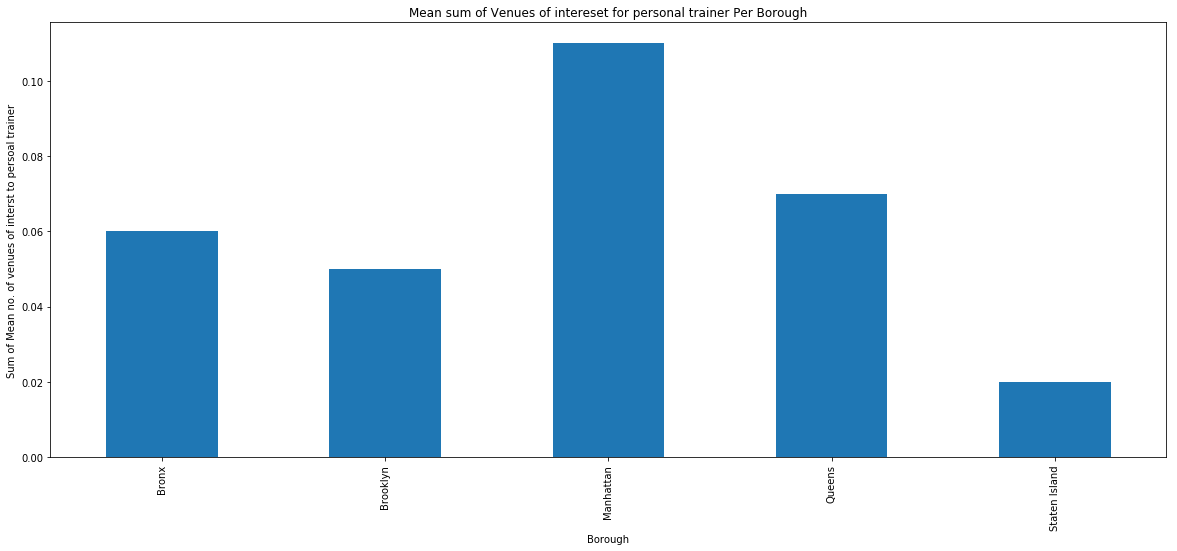

In [119]:
ax = Newyork_gym_occurrence['Sum'].plot(kind='bar',
                                    figsize=(20,8),
                                    title="Mean sum of Venues of intereset for personal trainer Per Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Sum of Mean no. of venues of interst to persoal trainer")

#### Manhattan will later be investigated as an area of potential relocation.

### 4) Find the no. of gyms in second: Toronto boroughs

Gettting the lattitude and longitude and mapping the boroughs within Toronto

In [53]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [54]:
# create map of New York Neighborhoods using latitude and longitude values
map_toronto_boroughs = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for Borough, Latitude, Longitude, Color in zip(toronto_boroughs['Borough'], toronto_boroughs['Latitude'], toronto_boroughs['Longitude'], toronto_boroughs["Color"]):
    label = '{}'.format(Borough)
    label = folium.Popup('Borough: ' + label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=25,
        popup=label,
        color= Color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_toronto_boroughs)  
    
map_toronto_boroughs


In [55]:
# drop downtown Toronto as businesses picked up within radius of central Toronto
toronto_boroughs

toronto_dropped2 = toronto_boroughs.drop(index = 1)
toronto_dropped2.reset_index(drop=True)

,Borough,Latitude,Longitude,Color
0,North York,43.770817,-79.413300,red
1,Etobicoke,43.643556,-79.565633,blue
2,Scarborough,43.773077,-79.257774,yellow
3,East York,43.699971,-79.332520,purple
4,York,43.689619,-79.479188,black
5,East Toronto,43.652387,-79.383564,orange
6,West Toronto,43.652387,-79.383564,grey
7,Central Toronto,43.652387,-79.383564,brown
8,Mississauga,43.678524,-79.629129,black


Getting the venues for the boroughs within Toronto.

In [56]:
toronto_venues = getNearbyVenues(names=toronto_dropped2['Borough'],
                                   latitudes=toronto_dropped2['Latitude'],
                                   longitudes=toronto_dropped2['Longitude']
                                  )

North York
Etobicoke
Scarborough
East York
York
East Toronto
West Toronto
Central Toronto
Mississauga


Looing at the 100 venues listed per borough

In [57]:
print(toronto_venues.shape)
toronto_venues.head()


(900, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.770817,-79.4133,Maryam Hotel,43.766961,-79.401199,Hotel
1,North York,43.770817,-79.4133,The Keg,43.766579,-79.412131,Steakhouse
2,North York,43.770817,-79.4133,Kinka Izakaya,43.760161,-79.409827,Japanese Restaurant
3,North York,43.770817,-79.4133,Earl Bales Park,43.753043,-79.436228,Park
4,North York,43.770817,-79.4133,Cho Sun Ok 조선옥 朝鮮屋,43.806614,-79.422186,Korean Restaurant


In [58]:
# We have an equal split of venues per borough
toronto_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Central Toronto,100,100,100,100,100,100
East Toronto,100,100,100,100,100,100
East York,100,100,100,100,100,100
Etobicoke,100,100,100,100,100,100
Mississauga,100,100,100,100,100,100
North York,100,100,100,100,100,100
Scarborough,100,100,100,100,100,100
West Toronto,100,100,100,100,100,100
York,100,100,100,100,100,100


Next we will look at the venue categories. 

In [59]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Borough'] = toronto_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Borough,Afghan Restaurant,Airport Lounge,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Stadium,Beach,Beer Bar,Beer Store,Bookstore,Botanical Garden,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Caribbean Restaurant,Castle,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Neighborhood,New American Restaurant,Noodle House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Plaza,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Road,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Xinjiang Restaurant,Zoo,Zoo Exhibit
0,North York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,North York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,North York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,North York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,North York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# grouping the data by borough
toronto_grouped = toronto_onehot.groupby('Borough').mean().reset_index()
toronto_grouped

,Borough,Afghan Restaurant,Airport Lounge,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Stadium,Beach,Beer Bar,Beer Store,Bookstore,Botanical Garden,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Caribbean Restaurant,Castle,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Neighborhood,New American Restaurant,Noodle House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Plaza,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Road,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Xinjiang Restaurant,Zoo,Zoo Exhibit
0,Central Toronto,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.04,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.08,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.07,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.02,0.00,0.03,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
1,East Toronto,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.04,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.08,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.07,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.02,0.00,0.03,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2,East York,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.01,0.02,0.02,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.04,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.11,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.05,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0

Looking at the venues of interest to a personal trainer.

In [61]:
Toronto_gym_occurrence = toronto_grouped['Borough'], toronto_grouped['Gym'], toronto_grouped['Athletics & Sports'], toronto_grouped['Dance Studio'], toronto_grouped['Gym / Fitness Center']




In [62]:
# Converting to a dataframe
Toronto_gym_occurrence = pd.DataFrame(list(Toronto_gym_occurrence))
Toronto_gym_occurrence

,0,1,2,3,4,5,6,7,8
Borough,Central Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Scarborough,West Toronto,York
Gym,0.04,0.04,0,0,0,0,0.01,0.04,0
Athletics & Sports,0,0,0.01,0,0,0,0.01,0,0
Dance Studio,0.01,0.01,0.01,0,0,0.01,0,0.01,0
Gym / Fitness Center,0,0,0,0,0.01,0,0.01,0,0


In [63]:
#Tranposing the data
Toronto_gym_occurrence = Toronto_gym_occurrence.transpose()
Toronto_gym_occurrence

,Borough,Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center
0,Central Toronto,0.04,0,0.01,0
1,East Toronto,0.04,0,0.01,0
2,East York,0,0.01,0.01,0
3,Etobicoke,0,0,0,0
4,Mississauga,0,0,0,0.01
5,North York,0,0,0.01,0
6,Scarborough,0.01,0.01,0,0.01
7,West Toronto,0.04,0,0.01,0
8,York,0,0,0,0


In [64]:
# Setting a new index
Toronto_gym_occurrence = Toronto_gym_occurrence.set_index('Borough')
Toronto_gym_occurrence

,Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center
Borough,,,,
Central Toronto,0.04,0,0.01,0
East Toronto,0.04,0,0.01,0
East York,0,0.01,0.01,0
Etobicoke,0,0,0,0
Mississauga,0,0,0,0.01
North York,0,0,0.01,0
Scarborough,0.01,0.01,0,0.01
West Toronto,0.04,0,0.01,0
York,0,0,0,0


Looking at the sum of the mean occurrence of venues of interest to a personal trainer in Toronto. This will help identify boroughs to anaylse further.

In [65]:
Toronto_gym_occurrence['Sum'] = Toronto_gym_occurrence.sum(axis = 1, skipna = True)
Toronto_gym_occurrence

,Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center,Sum
Borough,,,,,
Central Toronto,0.04,0,0.01,0,0.05
East Toronto,0.04,0,0.01,0,0.05
East York,0,0.01,0.01,0,0.02
Etobicoke,0,0,0,0,0.00
Mississauga,0,0,0,0.01,0.01
North York,0,0,0.01,0,0.01
Scarborough,0.01,0.01,0,0.01,0.03
West Toronto,0.04,0,0.01,0,0.05
York,0,0,0,0,0.00


Visualisaing the mean occurrence of venues of interest in Toronto

Text(0, 0.5, 'Sum of Mean no. of venues of interst to persoal trainer')

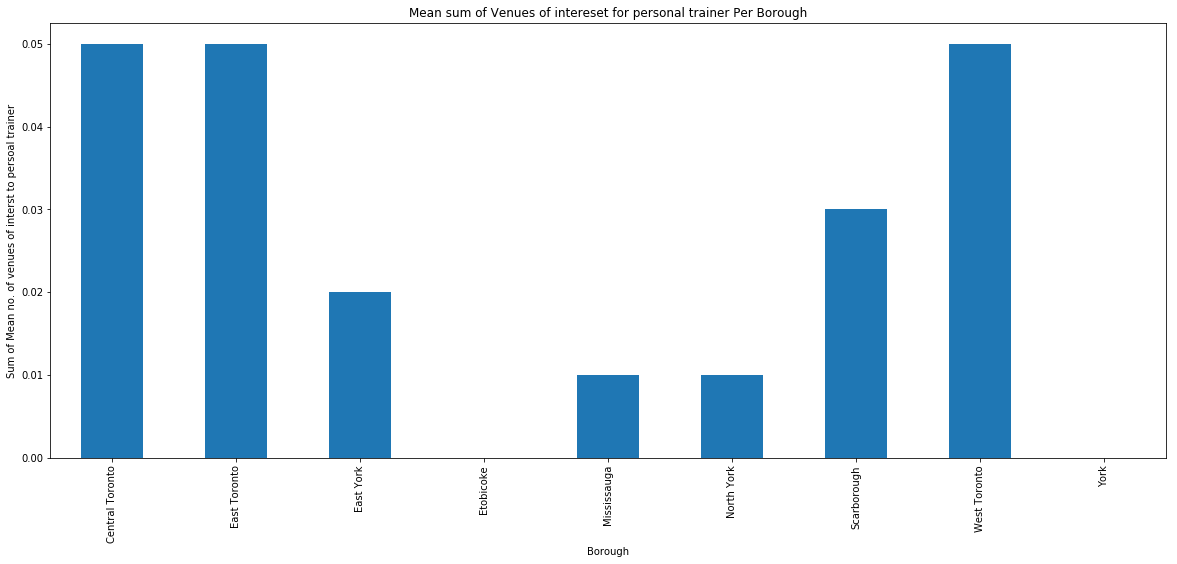

In [66]:
ax =Toronto_gym_occurrence['Sum'].plot(kind='bar',
                                    figsize=(20,8),
                                    title="Mean sum of Venues of intereset for personal trainer Per Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Sum of Mean no. of venues of interst to persoal trainer")

#### The areas of Central, West and East Toronto will be investigated as boroughs of interest.

Combinign the dataframes to visualise one city's boroughs against anothers

In [67]:
data_1 = pd.concat([Newyork_gym_occurrence,Toronto_gym_occurrence], axis=1, sort=True)  
data_1.head()

,Gym,Athletics & Sports,Boxing Gym,Climbing Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center,Track,Yoga Studio,Sum,Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center,Sum
Bronx,0.03,0,0.01,0,0,0,0,0.01,0.01,0.06,NaN,NaN,NaN,NaN,NaN
Brooklyn,0,0.01,0,0.01,0.01,0,0,0.01,0.01,0.05,NaN,NaN,NaN,NaN,NaN
Central Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0,0.01,0,0.05
East Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0,0.01,0,0.05
East York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.01,0.01,0,0.02


In [68]:
# Transposing data so it is useful for further analysis.
data_2 = data_1.transpose()
data_2 = data_2.drop(['East York', 'Etobicoke', 'Mississauga', 'North York', 'Scarborough', 'York','Bronx','Brooklyn','Staten Island', 'Queens'],axis=1)
data_2.head()
data_3 = data_2.transpose()

#### Visualising the venues of interset in both Toronto and New York

Text(0, 0.5, 'Sum of Mean no. of venues of interest to personal trainer')

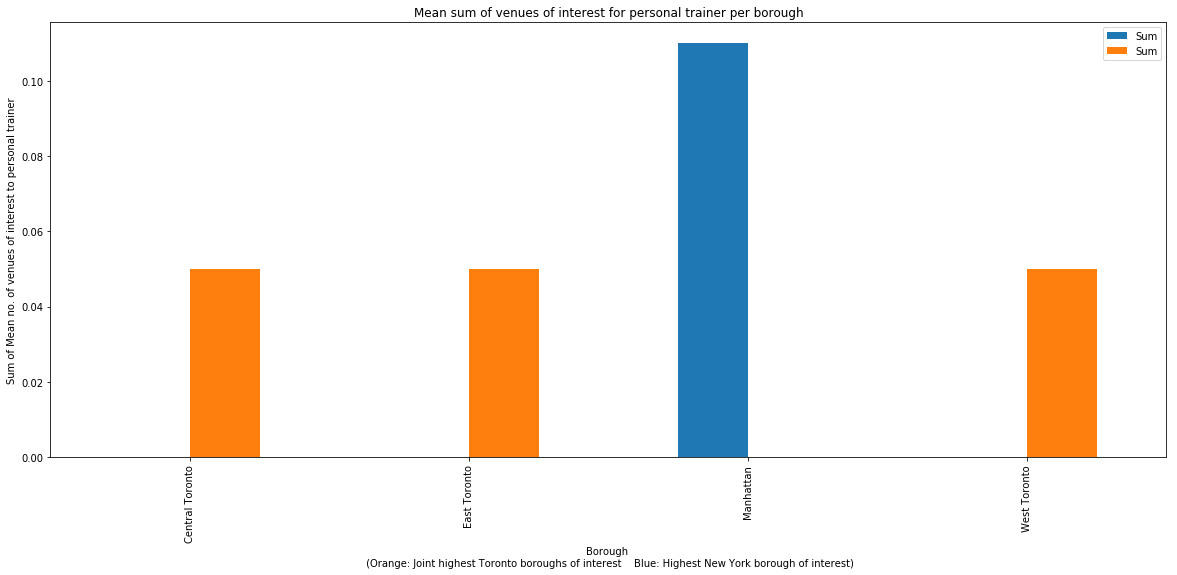

In [69]:
ax =data_3['Sum'].plot(kind='bar',
                                    figsize=(20,8),
                                    title="Mean sum of venues of interest for personal trainer per borough")
ax.set_xlabel("Borough \n (Orange: Joint highest Toronto boroughs of interest    Blue: Highest New York borough of interest)")
ax.set_ylabel("Sum of Mean no. of venues of interest to personal trainer")

####  Finding: It is clear that Manhattan appears to have a greater no. of venues of interest per 100 venues pulled by the foursquare API. Each individual borough displayed above will be investigated; looking specifically at the neighborhoods within them.

### 5) Looking at Gyms in Manhattan


Defining a function that will pull venues of interest for neighborhoods of interest.

In [70]:
def getNearbyVenues2(names, latitudes, longitudes):
    radius=15000
    LIMIT=10000
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Calling the function to pull venues within Manhattan area.

In [71]:
manhattan_data = areas[areas['Borough'] == 'Manhattan'].reset_index(drop=True)

manhattan_venues = getNearbyVenues2(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [72]:
# checking the venues pulled
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Next we will look at the venue categories. 

In [73]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Athletics & Sports,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bike Trail,Bookstore,Botanical Garden,Boxing Gym,Brewery,Bridge,Building,Butcher,Café,Cheese Shop,Church,Climbing Gym,Cocktail Bar,Coffee Shop,Comic Shop,Community Center,Concert Hall,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dog Run,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Field,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hot Dog Joint,Ice Cream Shop,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Library,Lighthouse,Lingerie Store,Market,Martial Arts School,Memorial Site,Mexican Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Opera House,Park,Performing Arts Venue,Pet Store,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Record Shop,Reservoir,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Soccer Field,Southern / Soul Food Restaurant,Spa,Speakeasy,State / Provincial Park,Stationery Store,Steakhouse,Supermarket,Taco Place,Thai Restaurant,Theater,Track,Trail,Udon Restaurant,Volleyball Court,Waterfront,Wine Shop,Yoga Studio,Zoo
0,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Grouping the data by neighborhood to see location of greatest no. of venues of interest.

In [74]:
# grouping the data by neighborhood. 
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped


,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Athletics & Sports,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bike Trail,Bookstore,Botanical Garden,Boxing Gym,Brewery,Bridge,Building,Butcher,Café,Cheese Shop,Church,Climbing Gym,Cocktail Bar,Coffee Shop,Comic Shop,Community Center,Concert Hall,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dog Run,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Field,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hot Dog Joint,Ice Cream Shop,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Library,Lighthouse,Lingerie Store,Market,Martial Arts School,Memorial Site,Mexican Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Opera House,Park,Performing Arts Venue,Pet Store,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Record Shop,Reservoir,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Soccer Field,Southern / Soul Food Restaurant,Spa,Speakeasy,State / Provincial Park,Stationery Store,Steakhouse,Supermarket,Taco Place,Thai Restaurant,Theater,Track,Trail,Udon Restaurant,Volleyball Court,Waterfront,Wine Shop,Yoga Studio,Zoo
0,Battery Park City,0.00,0.01,0.01,0.00,0.01,0.01,0.03,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.06,0.01,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.16,0.00,0.00,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.03,0.04,0.02,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.02,0.02,0.02,0.00,0.01,0.01,0.01,0.00,0.02,0.00,0.00
1,Carnegie Hill,0.00,0.01,0.02,0.02,0.00,0.01,0.07,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.03,0.02,0.00,0.00,0.04,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.13,0.02,0.00,0.01,0.00,0.03,0.00,0.03,0.00,0.01,0.01,0.00,0.00,0.02,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.02,0.00,0.06,0.01,0.00,0.00,0.00,0.01,0.03,0.03,0.00
2,Central Harlem,0.00,0.01,0.02,0.03,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.02,0.02,0.00,0.00,0.06,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.14,0.02,0.00,0.01,0.00,0.03,0.00,0.03,0.00,0.01,0.01,0.00,0.01,0.02,0.02,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.06,0.01,0.01,0.00,0.00,0.01,0.01,0.02,0.00
3,Chelsea,0.00,0.01,0.02,0.01,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.02,0.02,0.00,0.02,0.03,0.01,0.00,0.00,0.03,0.01,0.00,0.02,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.15,0.02,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.03,0.02,0.05,0.00,0.01,0.01,0.01,0.00,0.02,0.00,0.00
4,Chinatown,0.00,0.02,0.00,0.00,0.00,0.01,0.03,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.

Only looking at venue categories of interest to a personal trainer.

In [75]:
manhattan_gym_occurrence = manhattan_grouped['Neighborhood'], manhattan_grouped['Gym'], manhattan_grouped['Athletics & Sports'], manhattan_grouped['Boxing Gym'], manhattan_grouped['Climbing Gym'], manhattan_grouped['Athletics & Sports'], manhattan_grouped['Dance Studio'], manhattan_grouped['Gym / Fitness Center'],manhattan_grouped['Track'], manhattan_grouped['Yoga Studio']







In [76]:
#Converting the data to a dataframe and transposing
manhattan_gym_occurrence = pd.DataFrame(list(manhattan_gym_occurrence))
manhattan_gym_occurrence = manhattan_gym_occurrence.transpose()


Looking at the top 5 venue occurrence.

In [77]:
num_top_venues = 5

for hood in manhattan_gym_occurrence['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_gym_occurrence[manhattan_gym_occurrence['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                  venue  freq
0    Athletics & Sports  0.01
1          Climbing Gym  0.01
2    Athletics & Sports  0.01
3          Dance Studio  0.01
4  Gym / Fitness Center  0.01


----Carnegie Hill----
                  venue  freq
0                   Gym  0.03
1           Yoga Studio  0.03
2  Gym / Fitness Center  0.02
3            Boxing Gym  0.01
4          Climbing Gym  0.01


----Central Harlem----
                  venue  freq
0                   Gym  0.06
1            Boxing Gym  0.02
2           Yoga Studio  0.02
3          Climbing Gym  0.01
4  Gym / Fitness Center  0.01


----Chelsea----
                  venue  freq
0                   Gym  0.03
1            Boxing Gym  0.01
2          Dance Studio  0.01
3  Gym / Fitness Center  0.01
4    Athletics & Sports  0.00


----Chinatown----
                  venue  freq
0          Climbing Gym  0.01
1          Dance Studio  0.01
2  Gym / Fitness Center  0.01
3           Yoga Studio  0.01
4                

Define a function to look at the most common venues and sort the data

In [78]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Looking at the top 5 venue occurrence in a dataframe.

In [79]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
gym_venues_sorted = pd.DataFrame(columns=columns)
gym_venues_sorted['Neighborhood'] = manhattan_gym_occurrence['Neighborhood']

for ind in np.arange(manhattan_gym_occurrence.shape[0]):
    gym_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_gym_occurrence.iloc[ind, :], num_top_venues)

gym_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Battery Park City,Gym / Fitness Center,Dance Studio,Athletics & Sports,Climbing Gym,Athletics & Sports
1,Carnegie Hill,Yoga Studio,Gym,Gym / Fitness Center,Track,Dance Studio
2,Central Harlem,Gym,Yoga Studio,Boxing Gym,Track,Gym / Fitness Center
3,Chelsea,Gym,Gym / Fitness Center,Dance Studio,Boxing Gym,Yoga Studio
4,Chinatown,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Track


Setting up k-means clustering to identify neighborhood groupings of interest.

In [80]:
# set number of clusters
kclusters = 3

manhattan_grouped_clustering = manhattan_gym_occurrence.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:3] 

array([1, 0, 2], dtype=int32)

In [81]:
# add clustering labels
gym_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(gym_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,0,Gym,Yoga Studio,Boxing Gym,Track,Gym / Fitness Center
1,Manhattan,Chinatown,40.715618,-73.994279,1,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Track
2,Manhattan,Washington Heights,40.851903,-73.936900,2,Gym,Yoga Studio,Track,Gym / Fitness Center,Boxing Gym
3,Manhattan,Inwood,40.867684,-73.921210,0,Gym,Yoga Studio,Track,Boxing Gym,Gym / Fitness Center
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2,Gym,Yoga Studio,Boxing Gym,Track,Gym / Fitness Center


Mapping the Manhattan clusters. This provides areas of interest for potential relocation.

In [164]:
# create map
latitude = '40.7127281'
longitude = '-74.0060152'
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Looking at the Manhattan clusters. These will indicate the neighborhoods in which the personal trainer could relocate.

In [83]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Marble Hill,Gym,Yoga Studio,Boxing Gym,Track,Gym / Fitness Center
3,Inwood,Gym,Yoga Studio,Track,Boxing Gym,Gym / Fitness Center
7,East Harlem,Yoga Studio,Gym,Track,Gym / Fitness Center,Dance Studio
8,Upper East Side,Yoga Studio,Gym,Gym / Fitness Center,Track,Dance Studio
9,Yorkville,Yoga Studio,Gym,Track,Gym / Fitness Center,Dance Studio
10,Lenox Hill,Yoga Studio,Gym,Gym / Fitness Center,Track,Dance Studio
11,Roosevelt Island,Yoga Studio,Gym,Track,Gym / Fitness Center,Dance Studio
12,Upper West Side,Gym,Yoga Studio,Track,Gym / Fitness Center,Dance Studio
13,Lincoln Square,Gym,Yoga Studio,Gym / Fitness Center,Track,Dance Studio
14,Clinton,Gym,Gym / Fitness Center,Yoga Studio,Track,Dance Studio


In [84]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Chinatown,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Track
18,Greenwich Village,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Boxing Gym
19,East Village,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Boxing Gym
20,Lower East Side,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Track
21,Tribeca,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Track
22,Little Italy,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Track
23,Soho,Yoga Studio,Gym / Fitness Center,Dance Studio,Climbing Gym,Track
24,West Village,Gym,Gym / Fitness Center,Dance Studio,Climbing Gym,Boxing Gym
28,Battery Park City,Gym / Fitness Center,Dance Studio,Athletics & Sports,Climbing Gym,Athletics & Sports
29,Financial District,Gym / Fitness Center,Dance Studio,Athletics & Sports,Climbing Gym,Athletics & Sports


In [85]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Washington Heights,Gym,Yoga Studio,Track,Gym / Fitness Center,Boxing Gym
4,Hamilton Heights,Gym,Yoga Studio,Boxing Gym,Track,Gym / Fitness Center
5,Manhattanville,Gym,Yoga Studio,Boxing Gym,Track,Gym / Fitness Center
6,Central Harlem,Gym,Yoga Studio,Boxing Gym,Track,Gym / Fitness Center


Looking at the sum of mean occurrence of venues of interest. This will be sorted to identify which neighborhood is the candidate for relocation.

In [165]:
manhattan_gym_sum = manhattan_gym_occurrence.set_index('Neighborhood')
manhattan_gym_sum['Sum'] = manhattan_gym_sum.sum(axis = 1, skipna = True)
manhattan_gym_sum.sort_values(by=['Sum'], ascending=False,  inplace=True)
manhattan_gym_sum.tail(12)

,Gym,Athletics & Sports,Boxing Gym,Climbing Gym,Athletics & Sports,Dance Studio,Gym / Fitness Center,Track,Yoga Studio,Sum
Neighborhood,,,,,,,,,,
Inwood,0.03,0,0.01,0,0,0,0,0.01,0.01,0.06
Noho,0,0,0.01,0.01,0,0.01,0.01,0,0.02,0.06
Financial District,0,0.01,0,0.01,0.01,0.01,0.01,0,0,0.05
Marble Hill,0.03,0,0.01,0,0,0,0,0,0.01,0.05
Greenwich Village,0,0,0.01,0.01,0,0.01,0.01,0,0.01,0.05
Lower East Side,0,0,0,0.01,0,0.01,0.01,0,0.02,0.05
Battery Park City,0,0.01,0,0.01,0.01,0.01,0.01,0,0,0.05
Soho,0,0,0,0.01,0,0.01,0.01,0,0.01,0.04
Little Italy,0,0,0,0.01,0,0.01,0.01,0,0.01,0.04


#### Central Harlem, Manhattanville or Hamilton Heights is the recommended location for a personal trainer to relocate to in Manhattan. Although, anywhere in cluster 2 has sufficent no. of gym venues (>10%) relative to others.

Visualise the sum of mean occurrence of venues of interest within the neighborhoods in Manhattan.

Text(0, 0.5, 'Sum of mean no. of venues of interst to personal trainer')

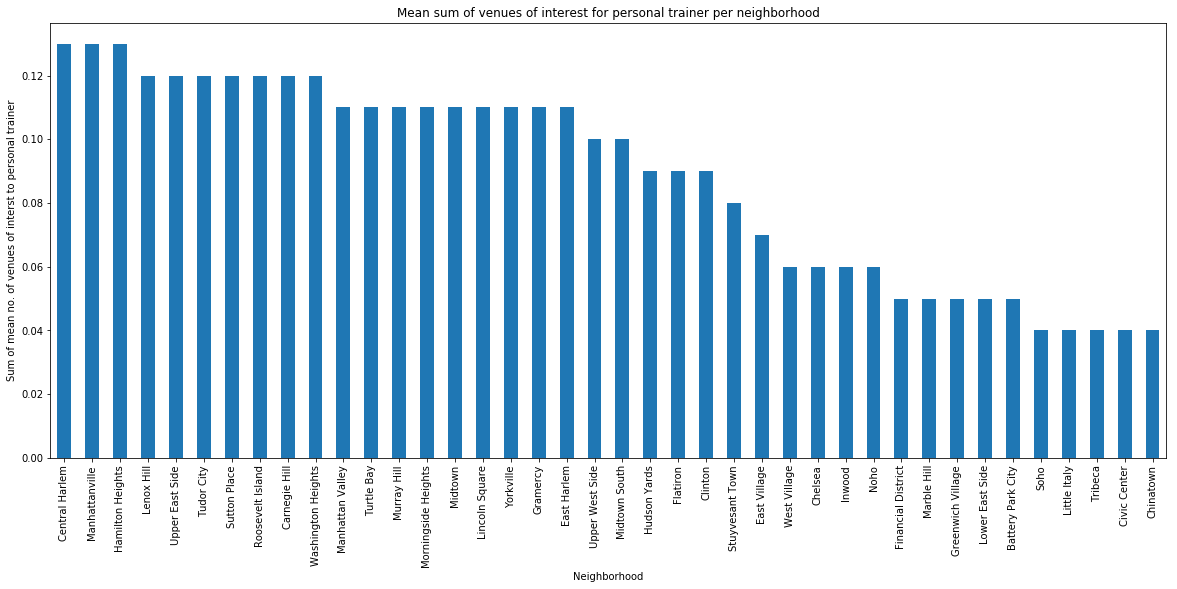

In [122]:
ax =manhattan_gym_sum['Sum'].plot(kind='bar',
                                    figsize=(20,8),
                                    title="Mean sum of venues of interest for personal trainer per neighborhood")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Sum of mean no. of venues of interst to personal trainer")

### 6) Repeat the above process for Toronto Boroughs of interest: East Toronto, West Toronto and Central Toronto

Split the Toronto dataframe to only look at the boroughs which had the joint highest sum of the mean occurrence of venues of interest.

In [88]:
Toronto_potential = toronto_df[toronto_df['Borough'].isin(['East Toronto', 'West Toronto', 'Central Toronto']) ]
Toronto_potential

,PostalCode,Borough,Neighborhood,Latitude,Longitude
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
37,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
43,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
47,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
54,M4M,East Toronto,Studio District,43.659526,-79.340923
61,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
62,M5N,Central Toronto,Roselawn,43.711695,-79.416936
67,M4P,Central Toronto,Davisville North,43.712751,-79.390197


Sending the request to the foursquaer API to look at venues in the identified Toronto boroughs of interest.

In [89]:
toronto_venues = getNearbyVenues2(names=Toronto_potential['Neighborhood'],
                                   latitudes=Toronto_potential['Latitude'],
                                   longitudes=Toronto_potential['Longitude']
                                  )

The Beaches
Dufferin, Dovercourt Village
Little Portugal, Trinity
The Danforth West, Riverdale
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Runnymede, Swansea
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Business reply mail Processing Centre, South Central Letter Processing Plant Toronto


Next we will look at the venue categories. 

In [90]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Wine Bar,American Restaurant,Aquarium,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Stadium,Beach,Beer Bar,Beer Store,Bookstore,Brewery,Bridge,Bubble Tea Shop,Butcher,Café,Caribbean Restaurant,Castle,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Doner Restaurant,Eastern European Restaurant,Egyptian Restaurant,Farm,Farmers Market,Field,Fish & Chips Shop,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Greek Restaurant,Grocery Store,Gym,Harbor / Marina,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Monument / Landmark,Museum,Music School,Music Store,Neighborhood,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Peruvian Restaurant,Pizza Place,Plaza,Ramen Restaurant,Record Shop,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Speakeasy,Steakhouse,Supermarket,Tapas Restaurant,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
#resetting the index
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Wine Bar,American Restaurant,Aquarium,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Stadium,Beach,Beer Bar,Beer Store,Bookstore,Brewery,Bridge,Bubble Tea Shop,Butcher,Café,Caribbean Restaurant,Castle,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Doner Restaurant,Eastern European Restaurant,Egyptian Restaurant,Farm,Farmers Market,Field,Fish & Chips Shop,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Greek Restaurant,Grocery Store,Gym,Harbor / Marina,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Monument / Landmark,Museum,Music School,Music Store,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Peruvian Restaurant,Pizza Place,Plaza,Ramen Restaurant,Record Shop,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Speakeasy,Steakhouse,Supermarket,Tapas Restaurant,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Brockton, Parkdale Village, Exhibition Place",0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.05,0.04,0.00,0.00,0.04,0.01,0.01,0.02,0.01,0.00,0.01,0.04,0.01,0.00,0.00,0.00,0.00,0.02,0.03,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.02,0.01,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.14,0.01,0.01,0.04,0.00,0.01,0.01,0.04,0.03,0.02,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.01,0.00,0.01,0.00
1,"Business reply mail Processing Centre, South C...",0.00,0.02,0.00,0.01,0.01,0.01,0.01,0.02,0.00,0.01,0.04,0.00,0.00,0.00,0.04,0.00,0.01,0.00,0.04,0.00,0.00,0.01,0.01,0.01,0.00,0.09,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.05,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.02,0.00,0.03,0.00,0.00,0.02,0.02,0.00,0.01,0.00,0.03,0.00,0.01,0.02,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.10,0.01,0.00,0.02,0.01,0.00,0.00,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.01,0.00,0.01,0.01,0.00
2,Davisville,0.01,0.02,0.00,0.01,0.01,0.00,0.02,0.02,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.08,0.01,0.01,0.00,0.00,0.03,0.01,0.08,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.03,0.01,0.01,0.01,0.03,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.09,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00
3,Davisville North,0.01,0.02,0.00,0.01,0.01,0.00,0.02,0.01,0.03,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.01,0.00,0.08,0.00,0.01,0.00,0.00,0.03,0.01,0.06,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.03,0.01,0.01,0.02,0.03,0.01,0.00,0.01,0.02,0.00,0.00,0.02,0.02,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.10,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.01,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00
4,"Dufferin, Dovercourt Village",0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.05,0.04,0.00,0.00,0.03,0.01,0.01,0.02,0.01,0.00,0.01,0.07,0.01,0.01,0.00,0.00,0.00,0.02,0.04,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.02,0.02,0.00,0.00,0.00,0.01,0.00,0.02,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.09,0.00,0.00,0.04,0.00,0.01,0.01,0.04,0.04,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.01,0.00,0.01,0.00
5,"Forest Hill North & West, Forest Hill Road Park",0.01,0.01,0.00,0.01,0.01,0.00,0.02,0.02,0.03,0.00,0.00,0.02,0.0

Only look at the venues that are of interest to a personal trainer.

In [92]:
toronto_gym_occurrence = toronto_grouped['Neighborhood'], toronto_grouped['Gym'], toronto_grouped['Athletics & Sports'], toronto_grouped['Athletics & Sports'], toronto_grouped['Dance Studio']
toronto_gym_occurrence 
# assumption here as changed no. of venues types as data not avaialble.





(0          Brockton, Parkdale Village, Exhibition Place
 1     Business reply mail Processing Centre, South C...
 2                                            Davisville
 3                                      Davisville North
 4                          Dufferin, Dovercourt Village
 5       Forest Hill North & West, Forest Hill Road Park
 6                         High Park, The Junction South
 7                        India Bazaar, The Beaches West
 8                                         Lawrence Park
 9                              Little Portugal, Trinity
 10                          Moore Park, Summerhill East
 11                   North Toronto West,  Lawrence Park
 12                               Parkdale, Roncesvalles
 13                                             Roselawn
 14                                   Runnymede, Swansea
 15                                      Studio District
 16    Summerhill West, Rathnelly, South Hill, Forest...
 17                  The Annex,

In [93]:
# convert to dataframe
toronto_gym_occurrence = pd.DataFrame(list(toronto_gym_occurrence))
toronto_gym_occurrence = toronto_gym_occurrence.transpose()
toronto_gym_occurrence.head()

,Neighborhood,Gym,Athletics & Sports,Athletics & Sports,Dance Studio
0,"Brockton, Parkdale Village, Exhibition Place",0.02,0,0,0
1,"Business reply mail Processing Centre, South C...",0.02,0.01,0.01,0.01
2,Davisville,0,0,0,0.01
3,Davisville North,0,0,0,0.01
4,"Dufferin, Dovercourt Village",0.02,0,0,0


Look at the top 5 venues within the areas of interest.

In [94]:
num_top_venues = 5
for hood in toronto_gym_occurrence['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_gym_occurrence[toronto_gym_occurrence['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Brockton, Parkdale Village, Exhibition Place----
                venue  freq
0                 Gym  0.02
1  Athletics & Sports  0.00
2  Athletics & Sports  0.00
3        Dance Studio  0.00


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0                 Gym  0.02
1  Athletics & Sports  0.01
2  Athletics & Sports  0.01
3        Dance Studio  0.01


----Davisville----
                venue  freq
0        Dance Studio  0.01
1                 Gym  0.00
2  Athletics & Sports  0.00
3  Athletics & Sports  0.00


----Davisville North----
                venue  freq
0        Dance Studio  0.01
1                 Gym  0.00
2  Athletics & Sports  0.00
3  Athletics & Sports  0.00


----Dufferin, Dovercourt Village----
                venue  freq
0                 Gym  0.02
1  Athletics & Sports  0.00
2  Athletics & Sports  0.00
3        Dance Studio  0.00


----Forest Hill North & West, Forest Hill Road Park----
       

Looking at the top 4 venue occurrence in a dataframe.

In [95]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_venues_sorted = pd.DataFrame(columns=columns)
toronto_venues_sorted['Neighborhood'] = toronto_gym_occurrence['Neighborhood']

for ind in np.arange(toronto_gym_occurrence.shape[0]):
    toronto_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_gym_occurrence.iloc[ind, :], num_top_venues)

toronto_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,"Brockton, Parkdale Village, Exhibition Place",Gym,Dance Studio,Athletics & Sports,Athletics & Sports
1,"Business reply mail Processing Centre, South C...",Gym,Dance Studio,Athletics & Sports,Athletics & Sports
2,Davisville,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
3,Davisville North,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
4,"Dufferin, Dovercourt Village",Gym,Dance Studio,Athletics & Sports,Athletics & Sports


Setting up k-means clustering to identify neighborhood groupings of interest.

In [96]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_gym_occurrence.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:3] 

array([0, 2, 1], dtype=int32)

In [97]:

# add clustering labels
toronto_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = Toronto_potential

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,Dance Studio,Gym,Athletics & Sports,Athletics & Sports
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
37,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,2,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
43,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports


Locating Toronto, Canada

In [162]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Mapping the Manhattan clusters. This provides areas of interest for potential relocation.

In [163]:
# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2


Looking at the Toronto clusters. These will indicate the neighborhoods in which the personal trainer could relocate.

In [100]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(2, toronto_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
31,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
37,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
43,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
69,West Toronto,"High Park, The Junction South",43.661608,-79.464763,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
74,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
75,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
81,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,0,Gym,Dance Studio,Athletics & Sports,Athletics & Sports


In [101]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(2, toronto_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
61,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
62,Central Toronto,Roselawn,43.711695,-79.416936,1,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
67,Central Toronto,Davisville North,43.712751,-79.390197,1,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
68,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,1,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
73,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,1,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
79,Central Toronto,Davisville,43.704324,-79.388790,1,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
83,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,1,Dance Studio,Athletics & Sports,Athletics & Sports,Gym
86,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,1,Dance Studio,Athletics & Sports,Athletics & Sports,Gym


In [102]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(2, toronto_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
19,East Toronto,The Beaches,43.676357,-79.293031,2,Dance Studio,Gym,Athletics & Sports,Athletics & Sports
41,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,2,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
47,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,2,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
54,East Toronto,Studio District,43.659526,-79.340923,2,Gym,Dance Studio,Athletics & Sports,Athletics & Sports
100,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,2,Gym,Dance Studio,Athletics & Sports,Athletics & Sports


Looking at the sum of mean occurrence of venues of interest. This will be sorted to identify which neighborhood is the candidate for relocation.

In [103]:
toronto_gym_sum = toronto_gym_occurrence.set_index('Neighborhood')
toronto_gym_sum['Sum'] = toronto_gym_sum.sum(axis = 1, skipna = True)
toronto_gym_sum.sort_values(by=['Sum'], ascending=False,  inplace=True)
toronto_gym_sum

,Gym,Athletics & Sports,Athletics & Sports,Dance Studio,Sum
Neighborhood,,,,,
The Beaches,0.02,0.01,0.01,0.02,0.06
"The Danforth West, Riverdale",0.02,0.01,0.01,0.01,0.05
Studio District,0.02,0.01,0.01,0.01,0.05
"India Bazaar, The Beaches West",0.02,0.01,0.01,0.01,0.05
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",0.02,0.01,0.01,0.01,0.05
"The Annex, North Midtown, Yorkville",0.02,0,0,0.01,0.03
"Little Portugal, Trinity",0.02,0,0,0,0.02
"Runnymede, Swansea",0.02,0,0,0,0.02
"Parkdale, Roncesvalles",0.02,0,0,0,0.02


####    The Beaches is the recommended location for a personal trainer to relocate to in Toronto boroughs of interest. Although, anywhere in cluster 2 has of gym venues (>5%) relative to others.

Visualising the sum of mean occurrence of venues of interset in neighborhoods within the Toronto boroughs identified as areas of interest.

Text(0, 0.5, 'Sum of Mean no. of venues of interest to personal trainer')

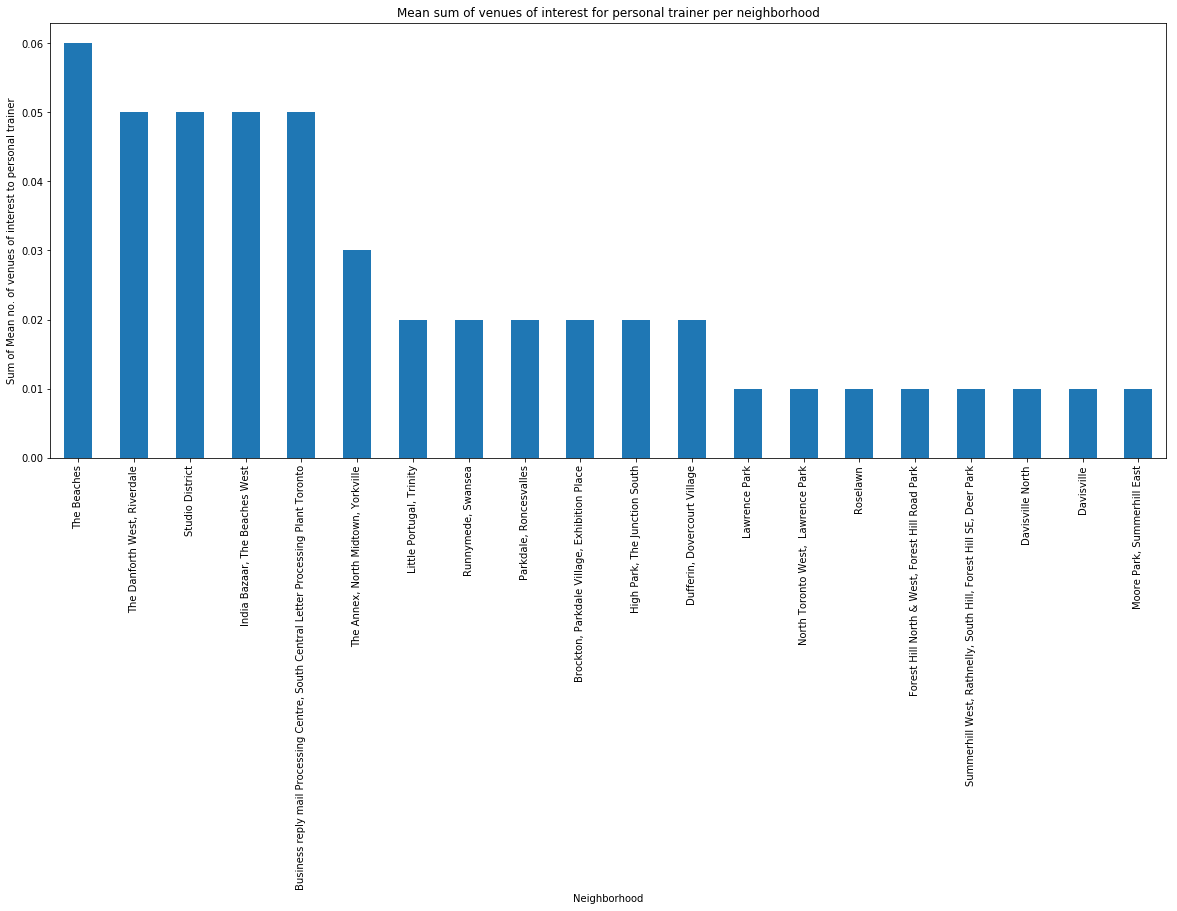

In [121]:
ax =toronto_gym_sum['Sum'].plot(kind='bar',
                                    figsize=(20,8),
                                    title="Mean sum of venues of interest for personal trainer per neighborhood")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Sum of Mean no. of venues of interest to personal trainer")

### 7) Finally to complete we will visualise the venues in 1) The Beaches, Toronto and 2) Central Harlem, Manhattanville and Hamilton Heights

Defining a function to extract venues related to "gym" within the neighborhoods identified as areas of interest.

In [105]:
def getGyms(names, latitudes, longitudes):
    radius=15000
    LIMIT=600
    query= "gym"
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url3 = 'https://api.foursquare.com/v2/venues/explore?&query={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            query,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
        )
            
        # make the GET request
        results = requests.get(url3).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

creating the relevant dataframes and calling the above function.

In [124]:
end_toronto = toronto_df[toronto_df['Neighborhood'] == 'The Beaches'].reset_index(drop=True)
end_newyork = manhattan_data[manhattan_data['Neighborhood'].isin(['Central Harlem', 'Manhattanville', 'Hamilton Heights']) ].reset_index(drop=True)

In [130]:
Beaches_gyms = getGyms(names=end_toronto['Neighborhood'],
                                   latitudes =end_toronto['Latitude'],
                                   longitudes=end_toronto['Longitude']
                                  )


The Beaches


In [127]:
Hamiltonplus_gyms = getGyms (names=end_newyork['Neighborhood'],
                                   latitudes =end_newyork['Latitude'],
                                   longitudes=end_newyork['Longitude']
                                  )


Hamilton Heights
Manhattanville
Central Harlem


Looking at the dataframes.

In [128]:
Hamiltonplus_gyms.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hamilton Heights,40.823604,-73.949688,Mercedes Club,40.767595,-73.992070,Gym / Fitness Center
1,Hamilton Heights,40.823604,-73.949688,Equinox Columbus Circle,40.768742,-73.982146,Gym / Fitness Center
2,Hamilton Heights,40.823604,-73.949688,Equinox,40.759180,-73.977784,Gym
3,Hamilton Heights,40.823604,-73.949688,Club Fitness,40.761824,-73.924858,Gym
4,Hamilton Heights,40.823604,-73.949688,Orangetheory Fitness,40.818783,-73.977731,Gym


In [131]:
Beaches_gyms.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,System Fitness,43.667171,-79.312733,Gym
1,The Beaches,43.676357,-79.293031,GoodLife Fitness Toronto 137 Yonge Street,43.651242,-79.378068,Gym
2,The Beaches,43.676357,-79.293031,Equinox Bay Street,43.648100,-79.379989,Gym
3,The Beaches,43.676357,-79.293031,LA Fitness,43.690360,-79.291339,Gym
4,The Beaches,43.676357,-79.293031,GoodLife Fitness Toronto Richmond and Bathurst,43.646365,-79.402312,Gym


Next we will look at the occurence of venue by category for Toronto neighborhoods of interest.

In [132]:
# one hot encoding
Beaches_onehot = pd.get_dummies(Beaches_gyms[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Beaches_onehot['Neighborhood'] = Beaches_gyms['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Beaches_onehot.columns[-1]] + list(Beaches_onehot.columns[:-1])
Beaches_onehot = Beaches_onehot[fixed_columns]

Beaches_onehot.head()

Beaches_grouped = Beaches_onehot.groupby('Neighborhood').mean().reset_index()
Beaches_grouped


,Neighborhood,Athletics & Sports,Bath House,Building,Climbing Gym,College Gym,Gym,Gym / Fitness Center,Gym Pool,Office,School,Soccer Stadium,Yoga Studio
0,The Beaches,0.02,0.01,0.01,0.01,0.05,0.66,0.16,0.01,0.01,0.01,0.01,0.04


In [134]:
Beaches_filtered = Beaches_grouped.drop(['Bath House','Building','Office','School','Soccer Stadium'], axis=1)
Beaches_filtered

,Neighborhood,Athletics & Sports,Climbing Gym,College Gym,Gym,Gym / Fitness Center,Gym Pool,Yoga Studio
0,The Beaches,0.02,0.01,0.05,0.66,0.16,0.01,0.04


Next we will look at the occurence of venue by category for Manhattan neighborhood of interest.

In [136]:
# one hot encoding
Hamiltonplus_onehot = pd.get_dummies(Hamiltonplus_gyms[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Hamiltonplus_onehot['Neighborhood'] = Hamiltonplus_gyms['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Hamiltonplus_onehot.columns[-1]] + list(Hamiltonplus_onehot.columns[:-1])
Hamiltonplus_onehot = Hamiltonplus_onehot[fixed_columns]

Hamiltonplus_onehot.head()

Hamiltonplus_grouped = Hamiltonplus_onehot.groupby('Neighborhood').mean().reset_index()
Hamiltonplus_grouped

,Neighborhood,Building,Club House,College Gym,Community Center,Cultural Center,Gym,Gym / Fitness Center,Residential Building (Apartment / Condo),School,Yoga Studio
0,Central Harlem,0.01,0.01,0.01,0.01,0.01,0.52,0.39,0.01,0.01,0.02
1,Hamilton Heights,0.01,0.01,0.01,0.01,0.01,0.51,0.40,0.01,0.01,0.02
2,Manhattanville,0.01,0.01,0.01,0.01,0.01,0.51,0.40,0.01,0.01,0.02


In [137]:
Hamiltonplus_filtered = Hamiltonplus_grouped.drop(['Building','Club House','School','Cultural Center','Community Center','Residential Building (Apartment / Condo)' ], axis=1)
Hamiltonplus_filtered


,Neighborhood,College Gym,Gym,Gym / Fitness Center,Yoga Studio
0,Central Harlem,0.01,0.52,0.39,0.02
1,Hamilton Heights,0.01,0.51,0.40,0.02
2,Manhattanville,0.01,0.51,0.40,0.02


Visualising the gym venues within Tudor City. This will give the personal trainer an idea of where potential clients are training the area with the mean highest occurrence of gym faciliteis.

In [160]:
address = 'Weehawken, New York'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of NYC are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_Hamiltonplus = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, venue, venuecat in zip(Hamiltonplus_gyms['Venue Latitude'], Hamiltonplus_gyms['Venue Longitude'], Hamiltonplus_gyms['Venue'],Hamiltonplus_gyms['Venue Category']):
    label = 'Name:\n {} \n Category:\n {}'.format(venue, venuecat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Hamiltonplus)  
    
map_Hamiltonplus


The geograpical coordinate of NYC are 40.733204, -74.0098.


Visualising the gym venues within Toronto neighborhoods. This will give the personal trainer an idea of where potential clients are training the areas with the mean highest occurrence of gym faciliteis in Toronto. Although, this is not as high as some neighborhoods within Manhattan e.g. Central Harlem.

In [150]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_Beaches = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, venue, venuecat in zip(Beaches_gyms['Venue Latitude'], Beaches_gyms['Venue Longitude'], Beaches_gyms['Venue'],Beaches_gyms['Venue Category']):
    label = 'Name:\n {} \n Category:\n {}'.format(venue, venuecat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Beaches)  
    
map_Beaches

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Final Statement: 

#### On the basis of occurrence of venues of interest, Central Harlem, Manhattanville and Hamilton Heights (NYC) have the most to offer in terms of potential clients if a personal trainer had the freedom to relocate to any neighborhood within the two cities. If we had to consider Toronto, The Beaches would be the recommended location; although, this is >60% lower compared to NYC. However, clearly other factorss would have to be considered in the viability of such a move.

####  To qualify this statement further additional data would be necessery as we are limtited here by calls to the free Foursquare API. 